# DATASET : [telco-CHURN](https://www.kaggle.com/datasets/abdallahwagih/telco-customer-churn)

In [7]:
!pip install pyjanitor==0.28.1
import janitor
!pip install openpyxl

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
pd.set_option('display.max_columns', None)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df = pd.read_excel('/content/data_m6.xlsx')
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [11]:
columns_eliminar = ["CustomerID","Count","Zip Code","Country","State","Lat Long","Latitude","Longitude","CLTV","Churn Label","Churn Score"]
df.drop(columns=columns_eliminar,inplace=True)
df.head(4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,Moved
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Moved


# EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df.dtypes.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
object,19
int64,2
float64,1


In [14]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
City,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0


In [15]:
print((df["Total Charges"]==" ").sum())

11


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
df["Total Charges"]=df["Total Charges"].replace(" ",np.nan)
print((df["Total Charges"]==" ").sum())

0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-7467c83fac96>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total Charges"]=df["Total Charges"].replace(" ",np.nan)


In [17]:
df.isna().sum() # validando q existe 11 valores vacios en total charges, lo eliminaremos ya que es poco representativo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
City,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0


In [18]:
df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,Moved
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Moved
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,Palm Springs,Male,No,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,1,Competitor offered higher download speeds
1865,Seeley,Female,No,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,1,Competitor offered higher download speeds
1866,Vidal,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1,Competitor offered higher download speeds
1867,White Water,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1,Competitor offered more data


In [19]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7043, 22)

In [20]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [21]:
df["Internet Service"].value_counts()
#hay dos categorias de servicio de internet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Internet Service,
Fiber optic,3096
DSL,2421
No,1526


In [22]:
df["City"].value_counts()
#hay mas de 1000 ciudades en el estudio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
City,
Los Angeles,305
San Diego,150
San Jose,112
Sacramento,108
San Francisco,104
...,...
Forest Knolls,4
Cotati,4
Bodega Bay,4


In [23]:
df["Churn Value"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Churn Value,
0,5174
1,1869


In [24]:
df["Payment Method"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Payment Method,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


## IMPUTACION DE DATOS FALTANTES

In [25]:
df["Churn Reason"] = df["Churn Reason"].fillna("Ninguno")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
valores_unicos = df["Churn Reason"].value_counts()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
df.head(4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,Moved
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Moved


# CODIFICACION DE VARIABLES CATEGORICAS

In [28]:
df_data_processing = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
df_data_processing.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
City,object
Gender,object
Senior Citizen,object
Partner,object
Dependents,object
Tenure Months,int64
Phone Service,object
Multiple Lines,object
Internet Service,object
Online Security,object


In [30]:
categorical_columns = df_data_processing.select_dtypes(object).columns
categorical_columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn Reason'],
      dtype='object')

In [31]:
import sklearn.compose
import sklearn.preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OneHotEncoder(), categorical_columns),
    remainder="passthrough"
)
categorical_transformer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn Reason'],
      dtype='object'))])

In [33]:
import sklearn.compose
import sklearn.preprocessing




# Obtener columnas categóricas y numéricas
categorical_columns = df_data_processing.select_dtypes(include=['object']).columns
numerical_columns = df_data_processing.select_dtypes(exclude=['object']).columns

# Crear transformadores para características categóricas y numéricas
categorical_transformer = sklearn.preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False para salida densa

# Crear el ColumnTransformer
preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', categorical_transformer, categorical_columns)],
    remainder='drop'  # o 'passthrough' si quieres mantener otras columnas
)

# Ajustar y transformar los datos
transformed_data = preprocessor.fit_transform(df_data_processing)

# Obtener nombres de características
feature_names = list(numerical_columns) + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))

# Crear el nuevo DataFrame
df_data_processing = pd.DataFrame(transformed_data, columns=feature_names, index=df_data_processing.index)

df_data_processing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tenure Months  Monthly Charges  Total Charges  Churn Value  City_Acampo  \
0               2.0            53.85         108.15          1.0          0.0   
1               2.0            70.70         151.65          1.0          0.0   
2               8.0            99.65         820.50          1.0          0.0   
3              28.0           104.80        3046.05          1.0          0.0   
4              49.0           103.70        5036.30          1.0          0.0   
...             ...              ...            ...          ...          ...   
7038           72.0            21.15        1419.40          0.0          0.0   
7039           24.0            84.80        1990.50          0.0          0.0   
7040           72.0           103.20        7362.90          0.0          0.0   
7041           11.0            29.60         346.45          0.0          0.0   
7042           66.0           105.65        6844.50          0.0          0.0   

      City_Acton  City_Adelanto  City_Adin  City_Agoura Hills  City_Aguanga  \
0            0.0            0.0        0.0                0.0           0.0   
1            0.0            0.0        0.0                0.0           0.0   
2            0.0            0.0        0.0                0.0           0.0   
3            0.0            0.0        0.0                0.0           0.0   
4            0.0            0.0        0.0                0.0           0.0   
...          ...            ...        ...                ...           ...   
7038         0.0            0.0        0.0                0.0           0.0   
7039         0.0            1.0        0.0                0.0           0.0   
7040         0.0            0.0        0.0                0.0           0.0   
7041         0.0            0.0        0.0                0.0           0.0   
7042         0.0            0.0        0.0                0.0           0.0   

      City_Ahwahnee  City_Alameda  City_Alamo  City_Albany  City_Albion  \
0               0.0           0.0         0.0          0.0          0.0   
1               0.0           0.0         0.0          0.0          0.0   
2               0.0           0.0         0.0          0.0          0.0   
3               0.0           0.0         0.0          0.0          0.0   
4               0.0           0.0         0.0          0.0          0.0   
...             ...           ...         ...          ...          ...   
7038            0.0           0.0         0.0          0.0          0.0   
7039            0.0           0.0         0.0          0.0          0.0   
7040            0.0           0.0         0.0          0.0          0.0   
7041            0.0           0.0         0.0          0.0          0.0   
7042            0.0           0.0         0.0          0.0          0.0   

      City_Alderpoint  City_Alhambra  City_Aliso Viejo  City_Alleghany  \
0                 0.0            0.0               0.0             0.0   
1                 0.0            0.0               0.0             0.0   
2                 0.0            0.0               0.0             0.0   
3                 0.0            0.0               0.0             0.0   
4                 0.0            0.0               0.0             0.0   
...               ...            ...               ...             ...   
7038              0.0            0.0               0.0             0.0   
7039              0.0            0.0               0.0             0.0   
7040              0.0            0.0               0.0             0.0   
7041              0.0            0.0               0.0             0.0   
7042              0.0            0.0               0.0             0.0   

      City_Alpaugh  City_Alpine  City_Alta  City_Altadena  City_Alturas  \
0              0.0          0.0        0.0            0.0           0.0   
1              0.0          0.0        0.0            0.0           0.0   
2              0.0          0.0        0.0            0.0           0

In [34]:
df_data_processing.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7043, 1197)

# ESCALABILIDAD DE DATOS

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)
df_data_processing_scaled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.02777778, 0.35422886, 0.01031041, ..., 0.        , 0.        ,
        0.        ],
       [0.02777778, 0.52189055, 0.01533003, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.80995025, 0.09251096, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.84527363, 0.84746134, ..., 0.        , 0.        ,
        0.        ],
       [0.15277778, 0.11293532, 0.03780868, ..., 0.        , 0.        ,
        0.        ],
       [0.91666667, 0.86965174, 0.78764136, ..., 0.        , 0.        ,
        0.        ]])

In [36]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)
df_data_processing_scaled.columns = df_data_processing.columns
df_data_processing_scaled


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tenure Months  Monthly Charges  Total Charges  Churn Value  City_Acampo  \
0          0.027778         0.354229       0.010310          1.0          0.0   
1          0.027778         0.521891       0.015330          1.0          0.0   
2          0.111111         0.809950       0.092511          1.0          0.0   
3          0.388889         0.861194       0.349325          1.0          0.0   
4          0.680556         0.850249       0.578987          1.0          0.0   
...             ...              ...            ...          ...          ...   
7038       1.000000         0.028856       0.161620          0.0          0.0   
7039       0.333333         0.662189       0.227521          0.0          0.0   
7040       1.000000         0.845274       0.847461          0.0          0.0   
7041       0.152778         0.112935       0.037809          0.0          0.0   
7042       0.916667         0.869652       0.787641          0.0          0.0   

      City_Acton  City_Adelanto  City_Adin  City_Agoura Hills  City_Aguanga  \
0            0.0            0.0        0.0                0.0           0.0   
1            0.0            0.0        0.0                0.0           0.0   
2            0.0            0.0        0.0                0.0           0.0   
3            0.0            0.0        0.0                0.0           0.0   
4            0.0            0.0        0.0                0.0           0.0   
...          ...            ...        ...                ...           ...   
7038         0.0            0.0        0.0                0.0           0.0   
7039         0.0            1.0        0.0                0.0           0.0   
7040         0.0            0.0        0.0                0.0           0.0   
7041         0.0            0.0        0.0                0.0           0.0   
7042         0.0            0.0        0.0                0.0           0.0   

      City_Ahwahnee  City_Alameda  City_Alamo  City_Albany  City_Albion  \
0               0.0           0.0         0.0          0.0          0.0   
1               0.0           0.0         0.0          0.0          0.0   
2               0.0           0.0         0.0          0.0          0.0   
3               0.0           0.0         0.0          0.0          0.0   
4               0.0           0.0         0.0          0.0          0.0   
...             ...           ...         ...          ...          ...   
7038            0.0           0.0         0.0          0.0          0.0   
7039            0.0           0.0         0.0          0.0          0.0   
7040            0.0           0.0         0.0          0.0          0.0   
7041            0.0           0.0         0.0          0.0          0.0   
7042            0.0           0.0         0.0          0.0          0.0   

      City_Alderpoint  City_Alhambra  City_Aliso Viejo  City_Alleghany  \
0                 0.0            0.0               0.0             0.0   
1                 0.0            0.0               0.0             0.0   
2                 0.0            0.0               0.0             0.0   
3                 0.0            0.0               0.0             0.0   
4                 0.0            0.0               0.0             0.0   
...               ...            ...               ...             ...   
7038              0.0            0.0               0.0             0.0   
7039              0.0            0.0               0.0             0.0   
7040              0.0            0.0               0.0             0.0   
7041              0.0            0.0               0.0             0.0   
7042              0.0            0.0               0.0             0.0   

      City_Alpaugh  City_Alpine  City_Alta  City_Altadena  City_Alturas  \
0              0.0          0.0        0.0            0.0           0.0   
1              0.0          0.0        0.0            0.0           0.0   
2              0.0          0.0        0.0            0.0           0

In [37]:
df_data_processing_scaled.to_excel('output.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_data_processing.to_excel('output_antes.xlsx', index=False)

# ENTRENAMIENTO DE MODELO CON ARBOL DE DECISIÓN

In [38]:
X = df_data_processing_scaled.drop('Churn Value',axis=1)
y = df_data_processing_scaled["Churn Value"]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state= 00000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2,random_state=00000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
tree.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(max_depth=2, random_state=0)

# EVALUAMOS EL MODELO

In [42]:
from sklearn.metrics import accuracy_score

y_test_pred = tree.predict(X_test)

test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'El accuracy es : {test_accuracy}')

El accuracy es : 1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-43-fa077c6a5448>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)


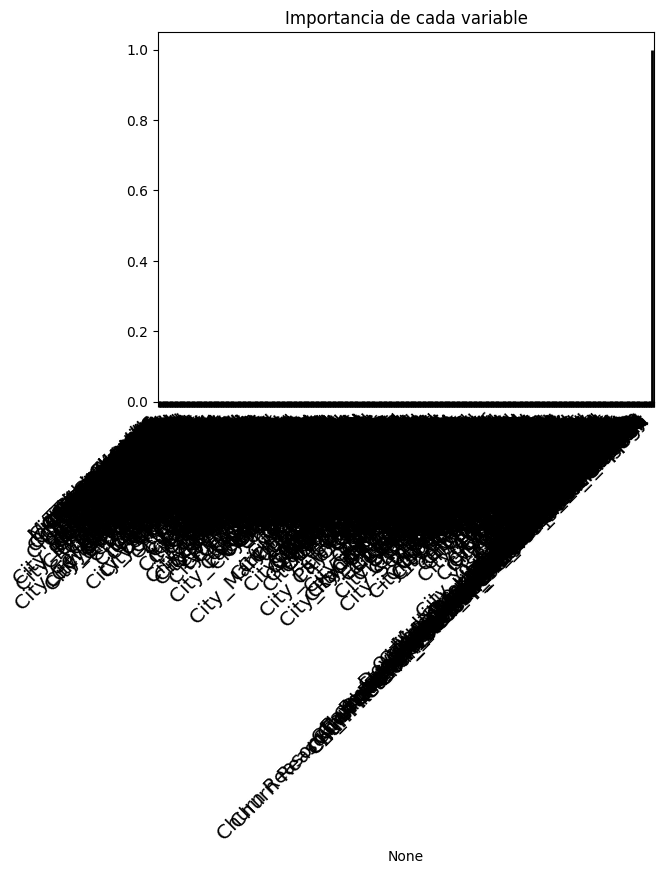

In [43]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada variable')
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


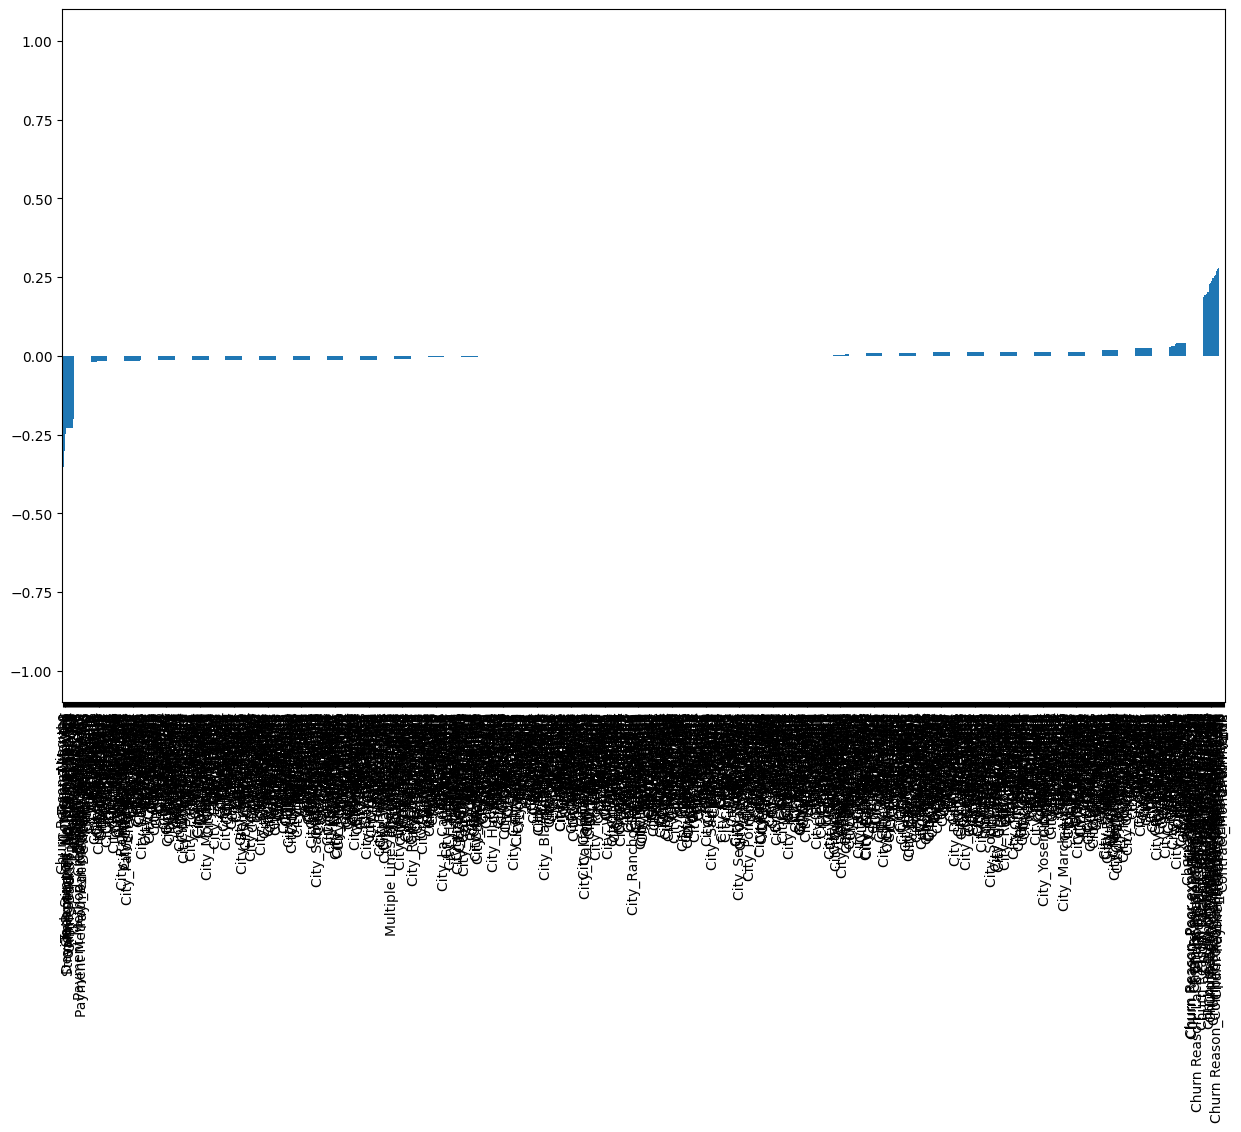

In [44]:
fig = plt.figure(figsize=(15,9))
df_data_processing_scaled.corr()['Churn Value'].sort_values(ascending=True).plot(kind='bar')
plt.show()

# ENTRENAMIENTO USANDO RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10,random_state=00000)
random_forest.fit(X_train,y_train)

random_forest_y_test_pred = random_forest.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
random_accuracy = accuracy_score(y_test,random_forest_y_test_pred)
print(f'El Accuracy para random forest es {random_accuracy}')

El Accuracy para random forest es 0.9820160908660672


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
rf_importances_df = pd.DataFrame(
    {"feature":list(X.columns),"importance":random_forest.feature_importances_}
).sort_values("importance",ascending=False)
rf_importances_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,feature,importance
1190,Churn Reason_Ninguno,0.347307
0,Tenure Months,0.036926
2,Total Charges,0.034664
1168,Contract_Two year,0.026365
1,Monthly Charges,0.025060
...,...,...
848,City_Rocklin,0.000000
846,City_Riverdale,0.000000
520,City_Lakeside,0.000000
403,City_Guerneville,0.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

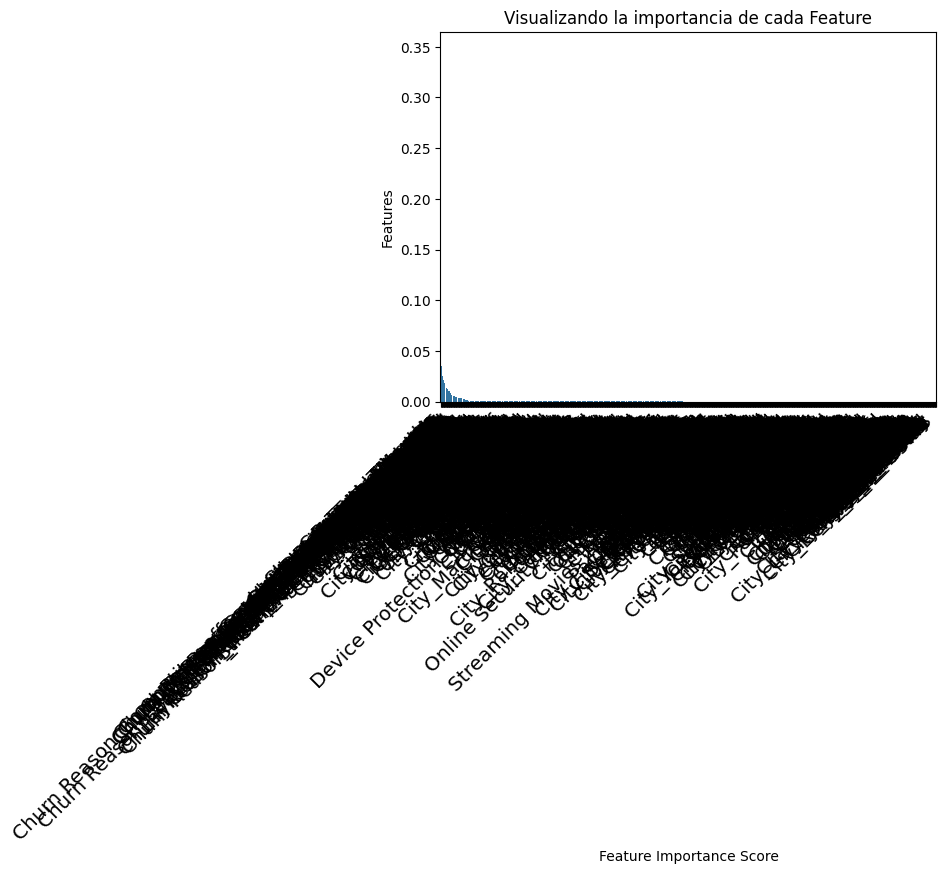

In [48]:
sns.barplot(x=rf_importances_df.feature,y=rf_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")